In [2]:
from abjad import *
%load_ext abjad.ext.ipython
%cd /Users/josephdavancens/git/dissertation
from dissertation import *
%cd /Users/josephdavancens/git/dissertation/dissertation/materials/segment01/
from tempo_map import tempo_map
from time_signatures import time_signatures

The abjad.ext.ipython extension is already loaded. To reload it, use:
  %reload_ext abjad.ext.ipython
/Users/josephdavancens/git/dissertation
/Users/josephdavancens/git/dissertation/dissertation/materials/segment01


ImportError: No module named segment01.time_signatures

In [3]:
print(tempo_map[0][1])
print(len(time_signatures[0][0]))

NameError: name 'tempo_map' is not defined

In [3]:
stage_1 = time_signatures[0][0]
groups = [3,2,4,3,4]
for group in sequencetools.partition_sequence_by_counts(stage_1, groups):
    print(group)

(TimeSignature((3, 4)), TimeSignature((2, 4)), TimeSignature((5, 8)))
(TimeSignature((3, 8)), TimeSignature((5, 8)))
(TimeSignature((2, 4)), TimeSignature((2, 4)), TimeSignature((3, 8)), TimeSignature((5, 8)))
(TimeSignature((2, 4)), TimeSignature((5, 8)), TimeSignature((3, 8)))
(TimeSignature((5, 8)), TimeSignature((3, 8)), TimeSignature((2, 4)), TimeSignature((3, 8)))


# Embouchure rhythms with Incised Rhythm Maker

In [4]:
maker = rhythmmakertools.IncisedRhythmMaker(
    incise_specifier=rhythmmakertools.InciseSpecifier(
        prefix_talea=[0],
        prefix_counts=[1],
        suffix_talea=[-3],
        suffix_counts=[1],
        talea_denominator=8,
        outer_divisions_only=True
    ),
    tie_specifier=rhythmmakertools.TieSpecifier(tie_across_divisions=True),
)

In [5]:
music = []
for group in sequencetools.partition_sequence_by_counts(stage_1, groups):
    incision = maker(group)
    music.extend(incision)

In [6]:
lpf = rhythmmakertools.make_lilypond_file(music, stage_1)

In [9]:
#show(lpf)

# Fingering rhythms with Tuplet Rhythm Maker

In [26]:
tuplet_spelling_specifier = rhythmmakertools.TupletSpellingSpecifier(
    avoid_dots=True,
    flatten_trivial_tuplets=True,
    is_diminution=True,
    simplify_tuplets=True,
)
maker = rhythmmakertools.TupletRhythmMaker(
    tuplet_ratios=[(-1,3,2,1),(3,2),(1,3,1,2)],
    tuplet_spelling_specifier=tuplet_spelling_specifier,
)

In [27]:
music = maker(stage_1[0:3])

In [28]:
lpf = rhythmmakertools.make_lilypond_file(music, stage_1[0:3])

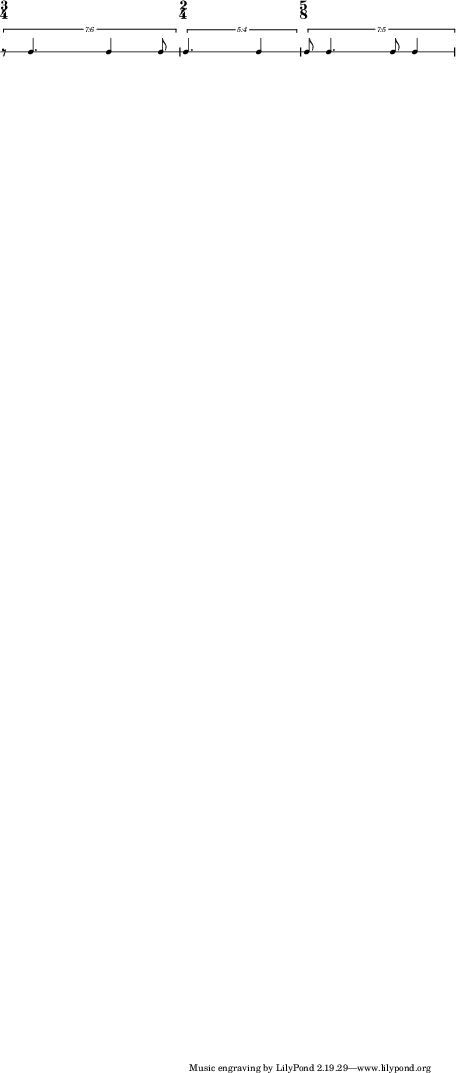

In [29]:
show(lpf)

# Embouchure rhythms with Note Rhythm Maker